In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize
import numpy as np
import os
import matplotlib.pyplot as plt
from natsort import natsorted
from src.datasets import calculate_mean_and_std, BiosensorDataset

In [2]:
torch.manual_seed(42)

data_path = 'data_with_centers/'
train_percent = 0.86
bio_len = 16
mask_size = 80


files = os.listdir(data_path)
train_size = int(train_percent * len(files))
val_size = len(files) - train_size
train_files, val_files = torch.utils.data.random_split(files, [train_size, val_size])

mean, std = calculate_mean_and_std(data_path, train_files, biosensor_length=bio_len)



train_dataset = BiosensorDataset(data_path, train_files, mean, std, bool, biosensor_length=bio_len, mask_size=mask_size)
val_dataset = BiosensorDataset(data_path, train_files, mean, std, bool, biosensor_length=bio_len, mask_size=mask_size)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=True)



torch.Size([4, 16, 80, 80])
torch.Size([4, 80, 80])
tensor([0, 1], dtype=torch.uint8)
2


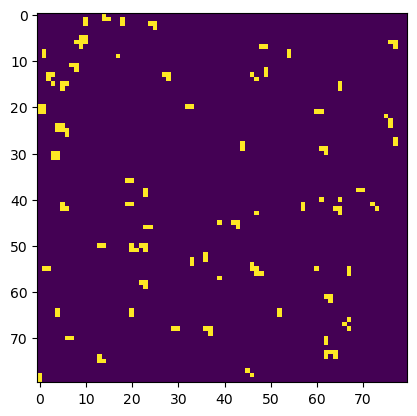

In [5]:
for bio, mask in train_loader:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break